In [1]:
import os

# set path to the dataset folder
dataset_folder = os.path.join(os.getcwd(), 'dataset')

# count the number of files in the dataset folder
num_files = len([f for f in os.listdir(dataset_folder) if os.path.isfile(os.path.join(dataset_folder, f))])
print(f'Number of files in dataset folder: {num_files}')

Number of files in dataset folder: 155


In [2]:
import pandas as pd
import os

# Initialize an empty list to store dataframes
dataframes = []
save_path = os.path.join(os.getcwd(), 'dataset_merge')

power_columns = ["Most_Recent_Forecast_MW", "Day_Ahead_Forecast_MW", "Week_Ahead_Forecast_MW", 
                      "Real_Time_Measurement_MW", "Corrected_Measurement_MW", "Monitored_Capacity_MWp", "Day_Ahead_11h00_MW"]

# Iterate over each file in the dataset folder
for file in os.listdir(dataset_folder):
    if file.endswith('.xls'):
        file_path = os.path.join(dataset_folder, file)
        
        # Load the Excel file
        df = pd.read_excel(file_path)
        
        # Rename columns for easier access
        df.columns = ["DateTime", "Most_Recent_Forecast_MW", "Day_Ahead_Forecast_MW", "Week_Ahead_Forecast_MW", 
                      "Real_Time_Measurement_MW", "Corrected_Measurement_MW", "Monitored_Capacity_MWp", "Day_Ahead_11h00_MW"]
        
        # Drop the first three rows which contain metadata
        df = df.iloc[3:].reset_index(drop=True)
        
        # Convert DateTime column to actual datetime format
        df["DateTime"] = pd.to_datetime(df["DateTime"], format="%d/%m/%Y %H:%M", errors='coerce')
        
        # Convert power columns to numeric values
        df[power_columns] = df[power_columns].apply(pd.to_numeric, errors="coerce")
        
        # Append the cleaned dataframe to the list
        dataframes.append(df)

# Concatenate all dataframes into a single dataframe
merged_df = pd.concat(dataframes, ignore_index=True)

# Save the merged dataframe to a new Excel file
merged_df.to_excel(os.path.join(save_path, 'dataset_merge.xlsx'), index=False)
# save to pandas object
merged_df.to_pickle(os.path.join(save_path, 'dataset_merge.pkl'))

# Display the merged dataframe
import ace_tools_open as tools
tools.display_dataframe_to_user(name="Merged Solar Power Output Data", dataframe=merged_df)

Merged Solar Power Output Data


In [3]:
# load the merged dataset
import pandas as pd
import os

# save path
save_path = os.path.join(os.getcwd(), 'dataset_merge')
# read the merged dataset
merged_df = pd.read_pickle(os.path.join(save_path, 'dataset_merge.pkl'))

# count number of rows in dataset
num_rows = merged_df.shape[0]
print(f'Number of rows in the merged dataset: {num_rows}')

Number of rows in the merged dataset: 452928


In [4]:
# cheack for missing values
missing_values = merged_df.isnull().sum()
print(f'Missing values in the merged dataset: \n{missing_values}')

Missing values in the merged dataset: 
DateTime                         0
Most_Recent_Forecast_MW          0
Day_Ahead_Forecast_MW       109728
Week_Ahead_Forecast_MW      159655
Real_Time_Measurement_MW         0
Corrected_Measurement_MW         0
Monitored_Capacity_MWp           0
Day_Ahead_11h00_MW            1152
dtype: int64


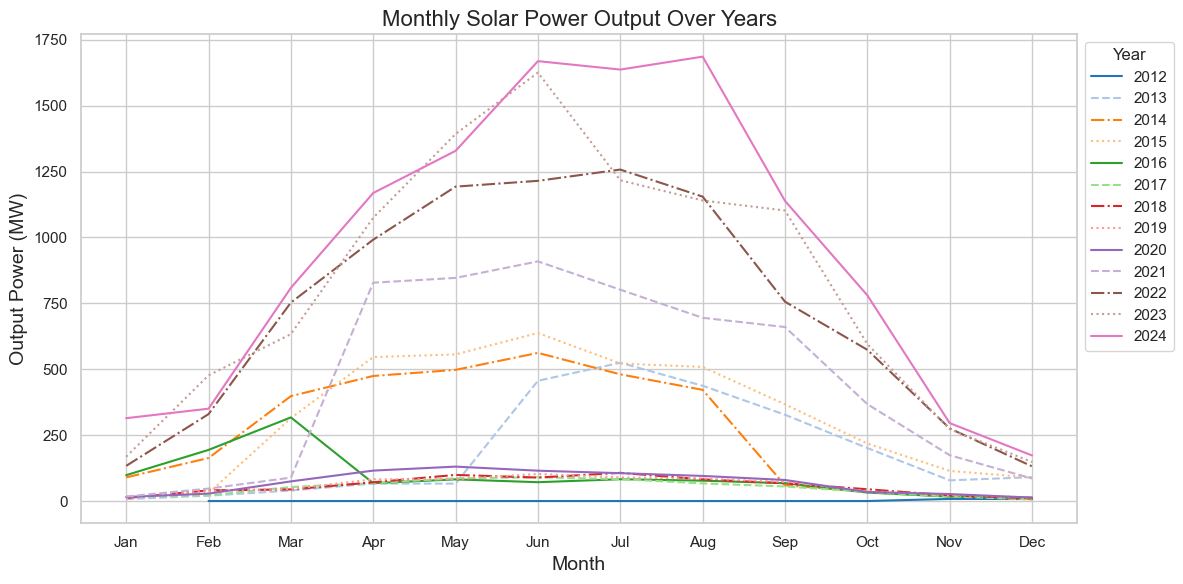

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Prepare the data
# Assuming merged_df is your DataFrame with 'DateTime' and 'Power' columns
merged_df['Year'] = merged_df['DateTime'].dt.year  # Extract the year
merged_df['Month'] = merged_df['DateTime'].dt.month  # Extract the month

# Group by Year and Month to calculate the average power for each month of each year
monthly_avg = merged_df.groupby(['Year', 'Month'])['Real_Time_Measurement_MW'].mean().reset_index()

# Step 2: Pivot the data for plotting
pivot_data = monthly_avg.pivot(index='Month', columns='Year', values='Real_Time_Measurement_MW')

# Define line styles
line_styles = ['-', '--', '-.', ':']

# Step 3: Plot the data
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Use a predefined color palette from seaborn
palette = sns.color_palette("tab20", len(pivot_data.columns))

# Loop through each year and plot the monthly data with different line styles
for i, (year, style) in enumerate(zip(pivot_data.columns, line_styles * (len(pivot_data.columns) // len(line_styles) + 1))):
    plt.plot(pivot_data.index, pivot_data[year], label=str(year), color=palette[i], linestyle=style)

# Customize the plot
plt.title("Monthly Solar Power Output Over Years", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Output Power (MW)", fontsize=14)
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Year", loc="upper left", bbox_to_anchor=(1, 1))

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

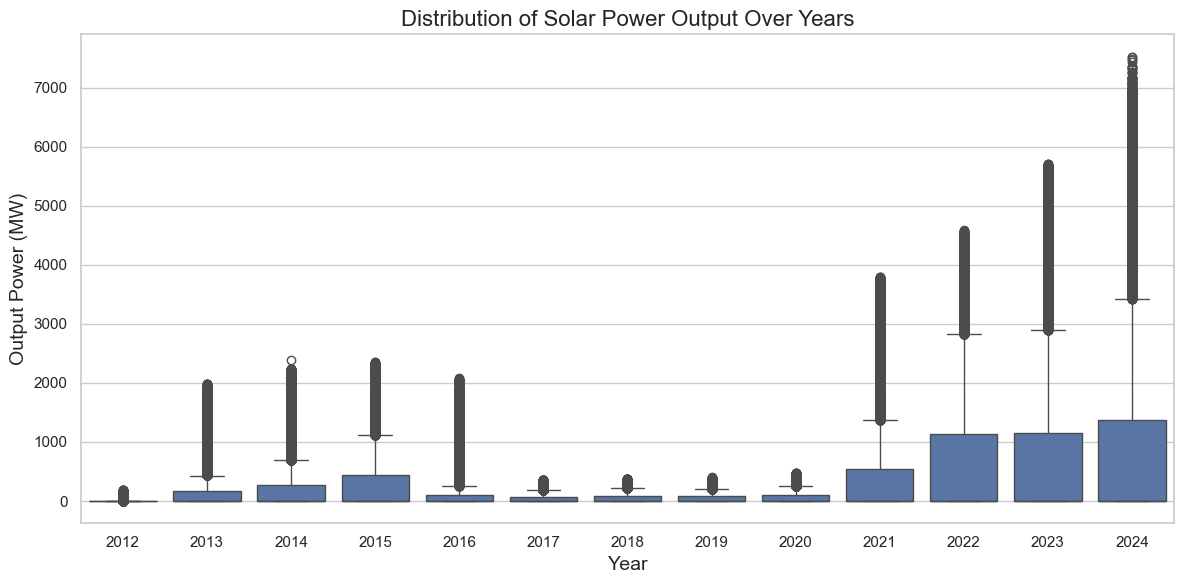

In [6]:
# use box plot to visualize the distribution of power output for each year
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Create a boxplot to show the distribution of power output for each year
sns.boxplot(x='Year', y='Real_Time_Measurement_MW', data=merged_df)

# Customize the plot
plt.title("Distribution of Solar Power Output Over Years", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Output Power (MW)", fontsize=14)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()